# mltools机器学习工具包应用示例
[mltools](https://danielsywang.github.io/mltools/)是从项目实战中提炼出来的一套机器学习工具包，其主要目标是加快数据探索、数据抽取、清洗转换、模型训练，让机器学习工程师专注数据分析和模型选择与评估。依赖的包主要有：numpy、pandas、sklearn、seaborn，统计部分有一点scipy.stats、 statsmodels.stats内容。
   
示例部分内容为演示如果正确使用[mltools](https://danielsywang.github.io/mltools/)机器学习工具包。

# 加载库和数据

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
from mltools import explore,feature,plot,mlcluster
from sklearn.datasets import make_blobs

# More Data Preprocessing & Machine Learning
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import SimpleImputer,KNNImputer,IterativeImputer
from sklearn import cluster
#from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.preprocessing import PowerTransformer,QuantileTransformer 
from sklearn.mixture import GaussianMixture

## 数据产生
sklearn中的示例数据没有很好反映项目分析过程中的实际情况，因此自己产生数据尽量反映实际情况。选用make_classification产生样本数n_samples=500,特征数n_features=5的数据集，并将其转换成DataFrame格式。

In [2]:
X, y = make_blobs(n_samples=500,n_features=5,random_state=1)
data=pd.DataFrame(X)
data=data.add_prefix('col_')
data

,col_0,col_1,col_2,col_3,col_4
0,-0.141771,3.654010,-5.561710,6.749957,-10.852914
1,0.153257,5.490891,-6.294500,8.674817,-9.285383
2,-0.533027,3.889833,-4.095322,6.606851,-9.233252
3,-8.643535,-5.900542,-1.883994,-2.157399,2.746535
4,-8.789110,-6.779138,-1.622573,-2.022040,0.066330
...,...,...,...,...,...
495,-0.031133,3.026263,-9.972184,-2.564078,-6.760700
496,-2.183581,2.950700,-9.002360,-4.301135,-8.456502
497,-7.936597,-6.994555,-3.890593,-2.240007,2.246613
498,-8.286480,-6.189705,-1.910791,-2.266651,-0.153064


## 加入Nan

In [3]:
#加入Nan
np.random.seed(100)
choice_list=[False,True]
p=[0.98,0.02]
mask = np.random.choice(choice_list, size=data.shape,p=p,replace=True)
data=data.mask(mask)
data[data.isnull().any(axis=1)]

,col_0,col_1,col_2,col_3,col_4
7,-1.286570,NaN,-6.176012,8.124907,-10.120067
16,-7.883550,-5.089507,-2.704176,NaN,1.533754
21,-7.131833,-5.573617,NaN,-1.741799,-0.128209
27,-1.381526,5.096522,NaN,NaN,NaN
29,-1.937638,NaN,-9.959491,-2.463272,-4.467091
46,-7.750437,-5.205726,NaN,-3.258757,-0.313626
56,NaN,-5.085142,-3.509735,-0.551581,-0.409423
73,-6.963466,-6.963849,-3.420619,NaN,0.137765
89,-0.923590,3.055128,-8.873487,-4.539752,NaN
90,-8.934573,NaN,-3.604700,-1.409286,2.194878


## 加入重复数据

In [4]:
''' Repeat without index  '''
ds=data.sample(n=10,random_state=0)
data = pd.concat([data]+[ds]*3, ignore_index=True)
data

,col_0,col_1,col_2,col_3,col_4
0,-0.141771,3.654010,-5.561710,6.749957,-10.852914
1,0.153257,5.490891,-6.294500,8.674817,-9.285383
2,-0.533027,3.889833,-4.095322,6.606851,-9.233252
3,-8.643535,-5.900542,-1.883994,-2.157399,2.746535
4,-8.789110,-6.779138,-1.622573,-2.022040,0.066330
...,...,...,...,...,...
525,-2.003885,5.311449,-9.693497,-2.498029,-7.332512
526,-7.193460,-7.067357,NaN,-2.906014,2.840359
527,-7.704753,NaN,-3.396437,-1.353495,2.916061
528,-8.731049,-6.014554,-3.033054,-2.248544,-0.737050


# 数据整理（探索）

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col_0   525 non-null    float64
 1   col_1   510 non-null    float64
 2   col_2   518 non-null    float64
 3   col_3   519 non-null    float64
 4   col_4   521 non-null    float64
dtypes: float64(5)
memory usage: 20.8 KB


## 空缺值分析

In [6]:
explore.null_count(data)

,total_missing,missing_percent
col_1,20,3.77
col_2,12,2.26
col_3,11,2.08
col_4,9,1.70
col_0,5,0.94


In [7]:
len(data[data.isnull().any(axis=1)])

54

本数据集共有530个样本，含有空值的样本为54个，占比为10.2%，可以考虑补充空缺数据。实际分析中是删除或补充或两种方法都用，要根据项目的具体情况决定。

## 重复值分析

In [8]:
data.duplicated().value_counts()

False    500
True      30
dtype: int64

本数据集共有530个样本，重复数据30条。实际分析中是删除或保留，要根据项目的具体情况决定。

## 唯一值分析

In [9]:
explore.unique_count(data)

,nunique


唯一值是某一列中只有一个值。当前数据集没有唯一值出现。实际分析中出现唯一值的列需要删除，因为这个属性对模型选择没有任何帮助。

## 负值分析

In [10]:
explore.negative_count(data)

,negative_count,negative_percent
col_2,518,97.74
col_0,506,95.47
col_4,387,73.02
col_3,352,66.42
col_1,176,33.21


当前数据集有负值，此处只是演示negative_count的用法。实际项目中某些列是不能出现负值的，负值意味着异常需要删除。

## 异常数据分析

异常值分析有两种方法：IQR和均值标准差方法，阈值可以任意设定。对IQR方法，通常设定method='IQR', threshold=1.5；极端异常值分析threshold=3。均值标准差方法通常设定method='IQR', threshold=3。 outlier_df表示各列异常值情况。异常值的处理在特征清洗与转换进行。

In [11]:
#IQR探索
outlier_count,outlier_df=explore.outlier_detect(data,method='IQR',threshold=1.5)

In [12]:
outlier_count

,lower_fence,upper_fence,lower_outlier,upper_outlier,total_outlier,total_percent
col_0,-16.91,7.86,0,0,0,0.0
col_1,-20.60,19.24,0,0,0,0.0
col_2,-17.83,5.08,0,0,0,0.0
col_3,-18.69,22.18,0,0,0,0.0
col_4,-22.27,13.49,0,0,0,0.0


In [13]:
outlier_df

,col_0,col_1,col_2,col_3,col_4


## 可视化

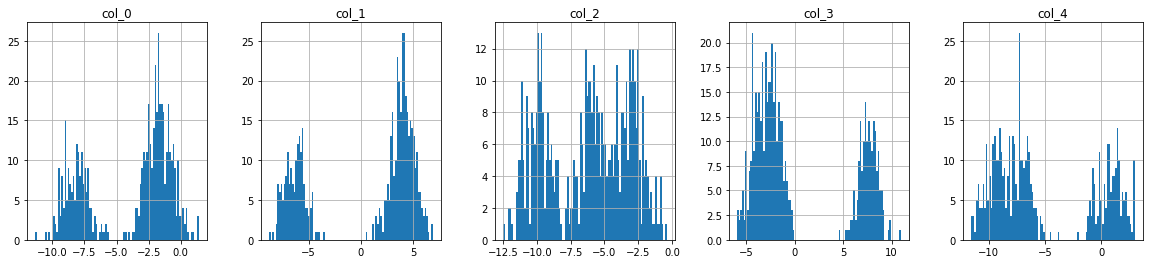

In [14]:
plot.hist_plot(data=data,ncol=5,figsize_x=20)

# 数据清洗及特征选择

数据清洗比较简单，此处不讲。特征选择是本节的主要内容。

这一部分的特征选择主要是解决特征之间的多重共线性问题，解决方法是VIF和Corr方法。

## VIF特征选择

VIF方法不能包含NaN值，因此需要处理。此处只是简单的删除，实际项目如何处理要根据具体情况再做决定。

In [15]:
df_notnull=data[~data.isnull().any(axis=1)]

In [16]:
VIF=feature.get_VIF(df_notnull)
VIF

,VIF,Column
0,4.841115,col_3
1,10.261113,col_0
2,12.944953,col_1
3,24.882742,col_2
4,26.979943,col_4


说明col_2、col_4列出现了高度相关，删除高度相关的列。

In [17]:
feature.get_VIF(df_notnull.drop(['col_2','col_4'],axis=1))

,VIF,Column
0,1.095365,col_3
1,1.308480,col_0
2,1.410221,col_1


从上面VIF结果知道，col_0、col_1、col_3的VIF都小于5，选以上3列作为特征是合适的。

实际项目中特征数量众多，需要综合考虑VIF、corr分析结果，与业务专家讨论确认特征！

# 特征转换与可视化

将特征转换作为聚类参数，详细内容在模型选择与评估部分讨论

## 特征转换及其正态检验

In [18]:
data=data.drop(labels=['col_2','col_4'],axis=1)
trans_method_list = ['cbrt', 'reciprocal', 'square', 'cube', 'minmax', 'zscore', 'robust', 'quant', 'yeo']
feature.transformer(data,trans_method_list=trans_method_list,test_method='ks')

,orginal,cbrt,reciprocal,square,cube,minmax,zscore,robust,quant,yeo
col_0,-,-,-,-,-,-,-,-,Normal,-
col_1,-,-,-,-,-,-,-,-,Normal,-
col_3,-,-,-,-,-,-,-,-,Normal,-


## 特征转换可视化

0

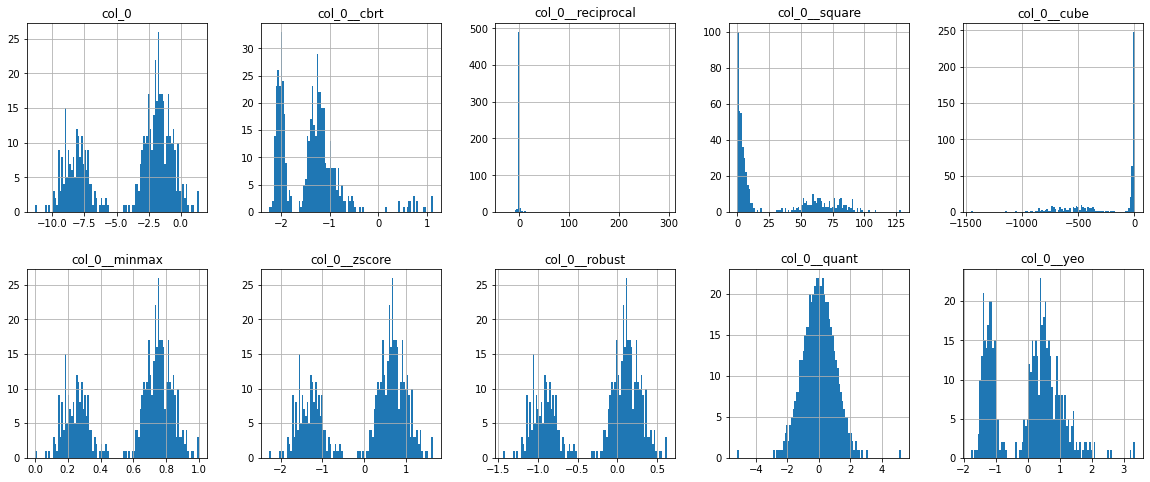

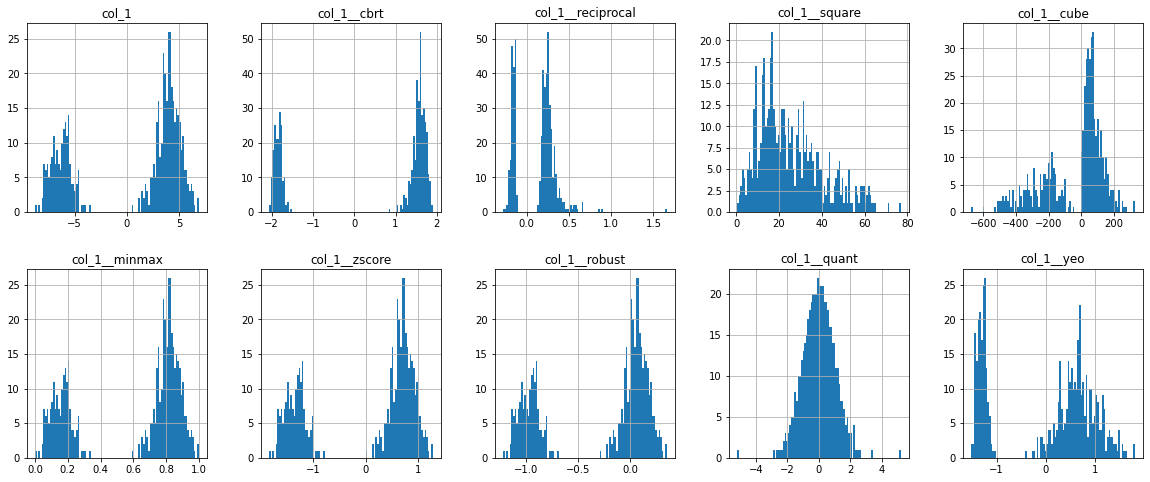

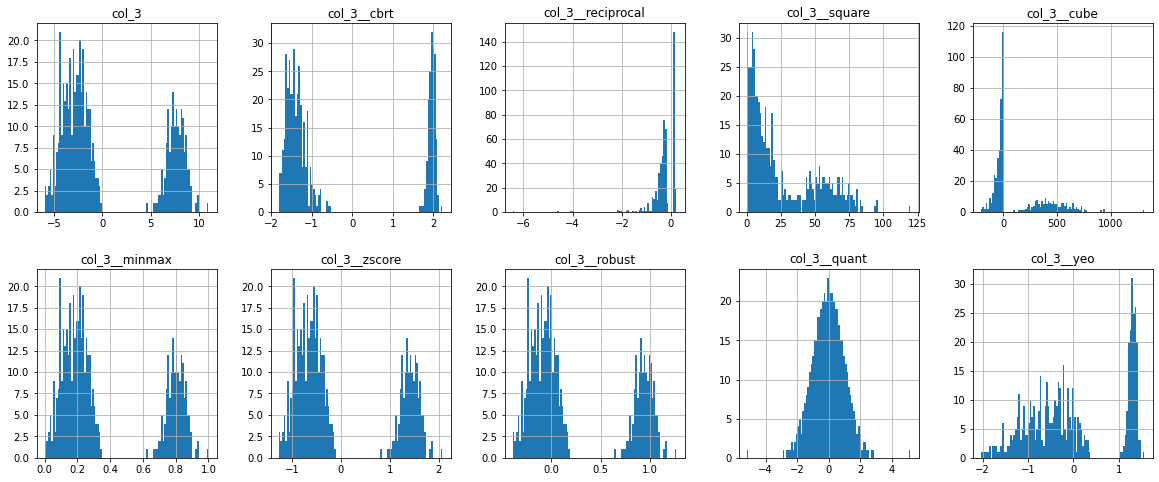

In [19]:
trans_method_list = ['cbrt', 'reciprocal', 'square', 'cube', 'minmax', 'zscore', 'robust', 'quant', 'yeo']
plot.trans_plot(data=data,trans_method_list=trans_method_list)

# 模型选择及评估

mlcluster.ClusterScorePlot继承了pipeline,参数定义中的cls为pipeline的steps，本例中清洗、转换、聚类作为参数设置。
mlcluster.ClusterScorePlot还可以设置清洗、转换、聚类方法的参数，对于复杂项目可以构建更复杂的管道。

## 模型初评

开始时我们不知道有多少个聚类，假设选取聚类数n_clusters=2，选取GaussianMixture、.KMeans聚类，看看效果。从下图可以看出n_clusters应该设为3。

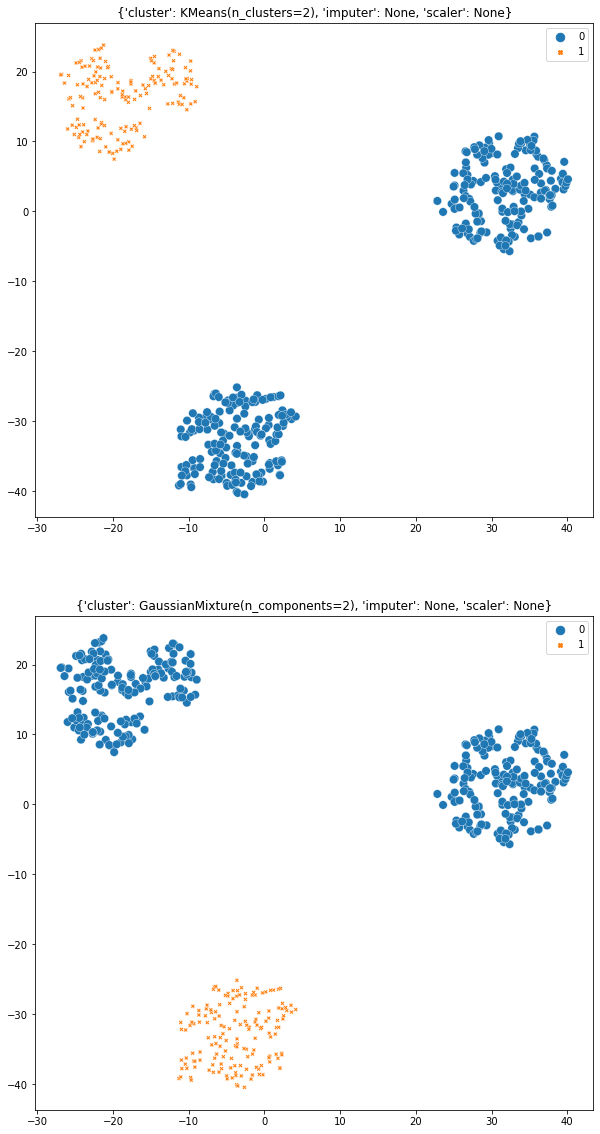

In [20]:
#setup steps:
n_clusters=2
cls =[('imputer', SimpleImputer(strategy='median')),
      ('scaler', StandardScaler()),
      ('cluster',cluster.AgglomerativeClustering(n_clusters=n_clusters))]
#setup param_grid
param_grid = [ 
    { 'imputer': [None],
     'scaler': [None],
     'cluster':[cluster.KMeans(n_clusters=n_clusters),
                GaussianMixture(n_components=n_clusters)]}
    ]
#setup scoring:
scoring = ['da', 'si', 'ca']
clustersearch=mlcluster.ClusterScorePlot(steps=cls,param_grid=param_grid,scoring=scoring)
clustersearch.plot(data,ncol=1)

## 模型调参

### 参数定义
imputer、scaler、cluster三个阶段的任务以列表的方式在cls中定义，其参数在param_grid中以字典的形式定义，聚类评价在scoring中定义。

In [21]:
#setup steps:
n_clusters=3
cls =[('imputer', SimpleImputer(strategy='median')),
      ('scaler', StandardScaler()),
      ('cluster',cluster.AgglomerativeClustering(n_clusters=n_clusters))]
#setup param_grid
lr = LinearRegression() 
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman',random_state=0) 
imp1 = IterativeImputer(random_state=0)
knn = KNNImputer(n_neighbors=2, add_indicator=True)

param_grid = [ 
    { 'imputer': [SimpleImputer(strategy='median'),imp,imp1,knn, None],
     'scaler': [MinMaxScaler(),StandardScaler(),RobustScaler(),PowerTransformer(),None],
     'cluster':[cluster.AgglomerativeClustering(n_clusters=n_clusters),
                 cluster.DBSCAN(eps=0.30, min_samples=10),
                cluster.KMeans(n_clusters=n_clusters),
                GaussianMixture(n_components=n_clusters)]},
    
    { 'imputer': [SimpleImputer(strategy='median'),imp,imp1,knn, None],
     'scaler': [QuantileTransformer(n_quantiles=100,random_state=0)],
     'cluster':[cluster.AgglomerativeClustering(n_clusters=n_clusters),
                 cluster.DBSCAN(eps=0.30, min_samples=10),
                cluster.KMeans(n_clusters=n_clusters),
                GaussianMixture(n_components=n_clusters)],
    'scaler__output_distribution':['uniform', 'normal']}]
#setup scoring:
scoring = ['da', 'si', 'ca']

### 参数网格搜索
通过参数网格搜索得到最佳参数

In [22]:
clustersearch=mlcluster.ClusterScorePlot(steps=cls,param_grid=param_grid,scoring=scoring)
df_score=clustersearch.get_score(data)

df_best_score=clustersearch.get_best_score(df_score,n_best_score=5)
pd.set_option('display.max_rows',200)
pd.set_option('display.max_colwidth',200)
df_best_score.reset_index(drop=True)


[IterativeImputer] Completing matrix with shape (530, 3)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.02
[IterativeImputer] Change: 7.620284332034443, scaled tolerance: 0.011335356993707154 
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.02
[IterativeImputer] Change: 0.11316669398578494, scaled tolerance: 0.011335356993707154 
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.02
[IterativeImputer] Change: 0.00012243243720222452, scaled tolerance: 0.011335356993707154 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (530, 3)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.00
[IterativeImputer] Change: 7.620284332034443, scaled tolerance: 0.011335356993707154 
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.00
[IterativeImputer] Change: 0.11316669398578494, scaled tolerance: 0.011335356993707154 
[IterativeImputer] Ending imputation round 3/10, elapsed ti

[IterativeImputer] Completing matrix with shape (530, 3)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.00
[IterativeImputer] Change: 7.620284332034443, scaled tolerance: 0.011335356993707154 
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.00
[IterativeImputer] Change: 0.11316669398578494, scaled tolerance: 0.011335356993707154 
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.01
[IterativeImputer] Change: 0.00012243243720222452, scaled tolerance: 0.011335356993707154 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (530, 3)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.00
[IterativeImputer] Change: 7.620284332034443, scaled tolerance: 0.011335356993707154 
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.00
[IterativeImputer] Change: 0.11316669398578494, scaled tolerance: 0.011335356993707154 
[IterativeImputer] Ending imputation round 3/10, elapsed ti

,param,da,si,ca
0,"{'cluster': AgglomerativeClustering(n_clusters=3), 'imputer': KNNImputer(add_indicator=True, n_neighbors=2), 'scaler': None}",0.266248,0.813408,5384.130887
1,"{'cluster': AgglomerativeClustering(n_clusters=3), 'imputer': None, 'scaler': None}",0.263954,0.814534,5035.913689
2,"{'cluster': KMeans(n_clusters=3), 'imputer': IterativeImputer(estimator=LinearRegression(), imputation_order='roman', random_state=0, verbose=2), 'scaler': None}",0.270683,0.809068,5133.544989
3,"{'cluster': KMeans(n_clusters=3), 'imputer': IterativeImputer(random_state=0), 'scaler': None}",0.270805,0.808884,5123.920033
4,"{'cluster': KMeans(n_clusters=3), 'imputer': KNNImputer(add_indicator=True, n_neighbors=2), 'scaler': None}",0.266248,0.813408,5384.130887
5,"{'cluster': KMeans(n_clusters=3), 'imputer': None, 'scaler': None}",0.263954,0.814534,5035.913689
6,"{'cluster': GaussianMixture(n_components=3), 'imputer': KNNImputer(add_indicator=True, n_neighbors=2), 'scaler': None}",0.266248,0.813408,5384.130887
7,"{'cluster': GaussianMixture(n_components=3), 'imputer': None, 'scaler': None}",0.263954,0.814534,5035.913689


### 根据最佳参数绘图

[IterativeImputer] Completing matrix with shape (530, 3)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.00
[IterativeImputer] Change: 7.620284332034443, scaled tolerance: 0.011335356993707154 
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.00
[IterativeImputer] Change: 0.11316669398578494, scaled tolerance: 0.011335356993707154 
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.01
[IterativeImputer] Change: 0.00012243243720222452, scaled tolerance: 0.011335356993707154 
[IterativeImputer] Early stopping criterion reached.


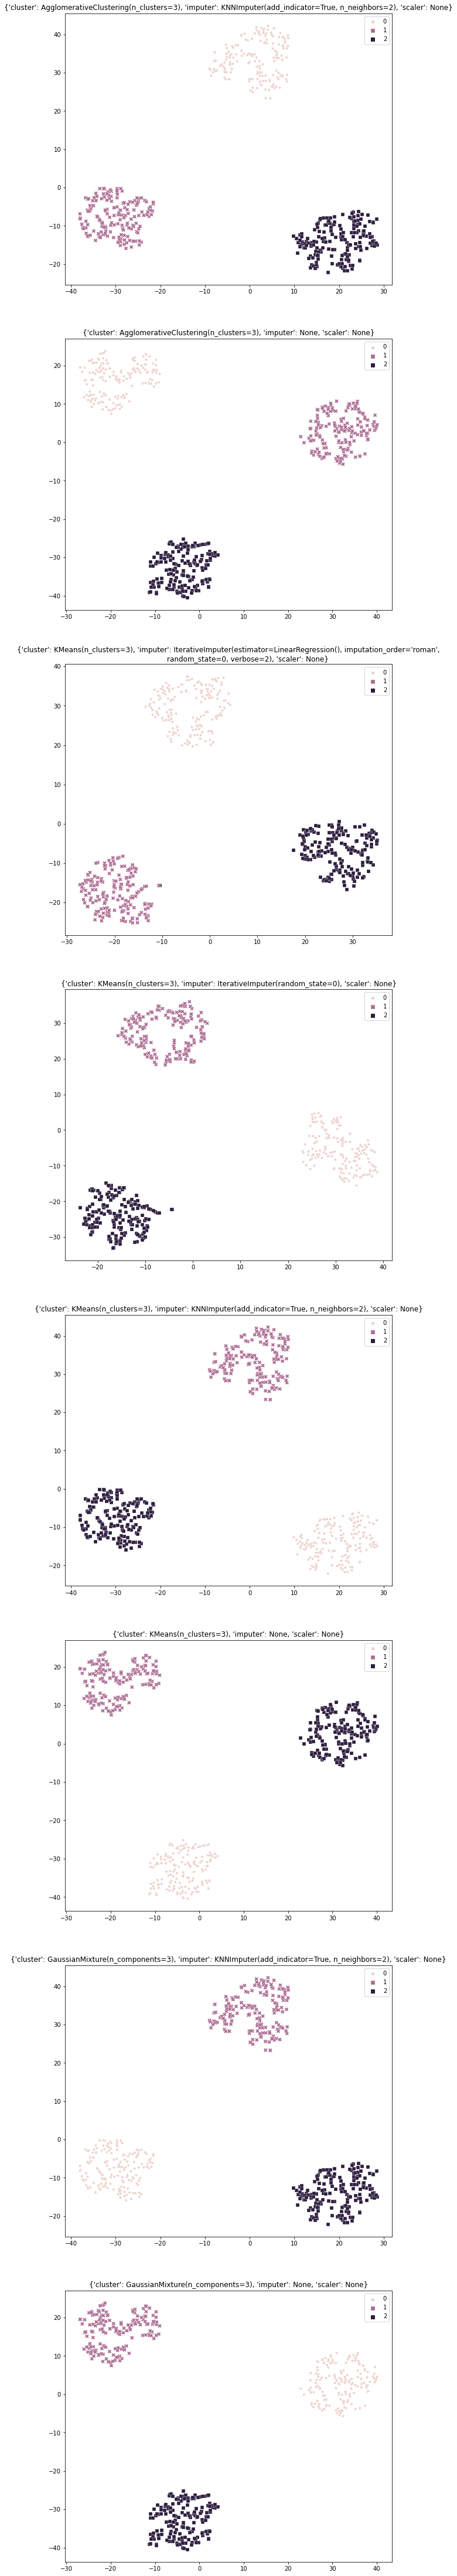

In [23]:
#setup param_grid
param_grid=list(df_best_score['param'])

clustersearch=mlcluster.ClusterScorePlot(steps=cls,param_grid=param_grid,scoring=scoring)
clustersearch.plot(data,param_type='',ncol=1)